# Training a multi-class classification model on the reuters dataset

In [1]:
# imports

# keras imports
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import reuters
from keras.preprocessing import sequence
from keras.utils.np_utils import to_categorical


# general imports
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown #just to display markdown

# utility functions
import os
import sys
%matplotlib inline
os.path.dirname(os.path.abspath("__file__"))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from utility.utils import utils
utility_obj = utils()

Using TensorFlow backend.


In [2]:
# Loading the Reuters dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Taking a look at the data
print ("\nbefore data preprocessing")
print('input_train shape:', train_data.shape)
print('input_test shape:', test_data.shape, "\n")

print("\nreuters dataset's 1 sample input data\n")
print(train_data[:1]) 

print("\nreuters dataset's 2 data lables")
print(train_labels[:2])

# pre-processing the dataset

# sentences pre-processing
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

print("\n reuters dataset's sample input data after encoding\n")
print(x_train[:1]) 

print("\nreuters dataset's lables after encoding")
print(x_test[:2])

# lables one-hot encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

# keras one-liner (lables one-hot encoding)
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


# model architecture development
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Compiling our model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


before data preprocessing
input_train shape: (8982,)
input_test shape: (2246,) 


reuters dataset's 1 sample input data

[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])]

reuters dataset's 2 data lables
[3 4]

 reuters dataset's sample input data after encoding

[[0. 1. 1. ... 0. 0. 0.]]

reuters dataset's lables after encoding
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


## Training model on reuter dataset

In [3]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=12,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/12
7982/7982 [==============================] - 1s 147us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/12
7982/7982 [==============================] - 0s 57us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/12
7982/7982 [==============================] - 0s 59us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/12
7982/7982 [==============================] - 0s 58us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/12
7982/7982 [==============================] - 0s 56us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/12
7982/7982 [==============================] - 0s 57us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/12
7982/7982 [==============================] - 0s 55us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 

## Plotting the training and validation loss & accuracy

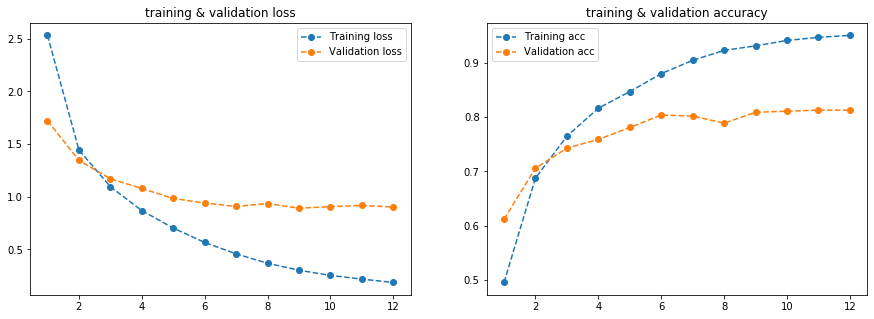

In [5]:
# ploting model training results
utility_obj.plot_training_history(history.history)